In [ ]:
import seaborn as sns
import pandas as pd
from google.colab import drive

In [ ]:

# Montar o Google Drive
drive.mount('/content/drive')

#eu dividi por 255 para normalizar as entradas
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/mnist_train.csv'
dados = pd.read_csv(caminho_arquivo)

atributos = dados.iloc[:, 1:].values.astype(float) / 255.0
classe = dados.iloc[:, 0].values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Os valores da entrada são dividos por 255 para normalizar os valores, deixando-os entre 0 e 1, melhorando a convergência do modelo.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.utils import to_categorical


classe_dummy = to_categorical(classe)

Os dados de saída são alterados para o formato categórico para um processamento mais eficiente

Epoch 1/20
4800/4800 [==============================] - 41s 8ms/step - loss: 0.3402 - categorical_accuracy: 0.8971 - val_loss: 0.1684 - val_categorical_accuracy: 0.9493
Epoch 2/20
4800/4800 [==============================] - 41s 9ms/step - loss: 0.2051 - categorical_accuracy: 0.9362 - val_loss: 0.1227 - val_categorical_accuracy: 0.9636
Epoch 3/20
4800/4800 [==============================] - 41s 9ms/step - loss: 0.1666 - categorical_accuracy: 0.9480 - val_loss: 0.1095 - val_categorical_accuracy: 0.9682
Epoch 4/20
4800/4800 [==============================] - 40s 8ms/step - loss: 0.1372 - categorical_accuracy: 0.9574 - val_loss: 0.1279 - val_categorical_accuracy: 0.9653
Epoch 5/20
4800/4800 [==============================] - 40s 8ms/step - loss: 0.1218 - categorical_accuracy: 0.9627 - val_loss: 0.1089 - val_categorical_accuracy: 0.9697
Epoch 6/20
4800/4800 [==============================] - 40s 8ms/step - loss: 0.1059 - categorical_accuracy: 0.9676 - val_loss: 0.1029 - val_categorical_acc

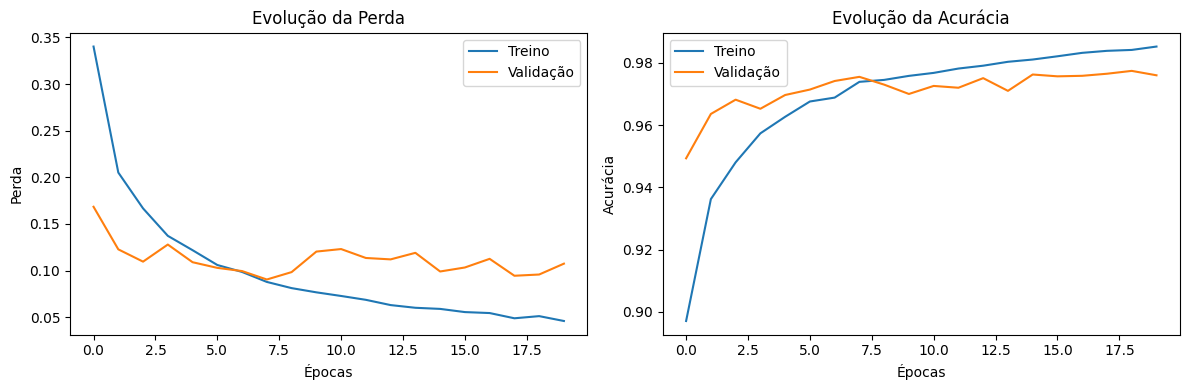

In [ ]:
mlp = Sequential()
#normalizando a cada camada
mlp.add(Dense(units=397, activation='relu',kernel_initializer='random_uniform',input_dim=784))
mlp.add(BatchNormalization())
mlp.add(Dense(units=397, activation='relu',kernel_initializer='random_uniform'))
mlp.add(BatchNormalization())
mlp.add(Dense(units=10, activation='softmax'))

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
import matplotlib.pyplot as plt

import time

# Treinamento com validação
start = time.time()
history = mlp.fit(atributos, classe_dummy, epochs=20, batch_size=10, validation_split=0.2)
elapsed = (time.time() - start)

# Plotar a evolução da perda e acurácia
plt.figure(figsize=(12, 4))

# Gráfico da Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico da Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'], label='Treino')
plt.plot(history.history['val_categorical_accuracy'], label='Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

print("tempo gasto = ", elapsed)


tempo gasto =  803.6885077953339


O arquivo possui 784 colunas para definir os números (valores dos pixels), ou seja, há 784 entradas. Os dígitos vão de "0" a "9", então há 10 saídas. Usamos a fórmula recomendada para definir a quantidade de neurônios na camada oculta: (número de entradas + número de saídas/2), então há 397 neurônios em cada camada oculta.
O batch normalization é usado para melhorar a eficiência do treinamento, permitindo uma convergência em um tempo menor e reduzindo o overfitting.

In [ ]:
print("tempo gasto = ", elapsed, "segundos")

tempo gasto =  803.6885077953339 segundos


In [ ]:
#eu dividi por 255 para normalizar as entradas
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/mnist_test.csv'
dadosTeste = pd.read_csv(caminho_arquivo)
atributosT = dadosTeste.iloc[0:,1:].values.astype(float) / 255.0;
classeT = dadosTeste.iloc[0:,:1].values

classeT_dummy = to_categorical(classeT)

resultado = mlp.evaluate(atributosT, classeT_dummy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1115 - categorical_accuracy: 0.9778


In [ ]:
resultado

[0.11149740219116211, 0.9778000116348267]

Mesmo com poucas épocas, tem-se uma perda baixa e uma acurácia alta.

In [ ]:
respostas = mlp.predict(atributosT)

respostas[0:5,:]

313/313 [==============================] - 1s 3ms/step


array([[7.0968599e-07, 2.3866347e-12, 1.7531574e-08, 1.4328677e-05,
        3.1761965e-10, 8.5176410e-08, 2.0410711e-07, 9.9998301e-01,
        8.6686009e-09, 1.4820383e-06],
       [8.0993120e-12, 3.0600834e-08, 9.9999994e-01, 8.6306110e-15,
        3.6938632e-19, 4.9771401e-13, 1.9154764e-09, 4.4147924e-18,
        3.7159722e-09, 1.2562039e-18],
       [2.6371583e-10, 9.9968672e-01, 5.8019310e-07, 4.4012850e-08,
        5.8910249e-10, 5.9845438e-06, 1.5794949e-04, 3.8675948e-06,
        1.4485222e-04, 1.6899596e-09],
       [9.9999970e-01, 9.8191180e-09, 1.7991187e-08, 9.7918118e-09,
        1.0317407e-12, 6.0615034e-11, 7.6407396e-08, 3.3342487e-09,
        2.1719691e-08, 1.0448993e-07],
       [1.6925561e-12, 5.2353708e-09, 3.5049180e-10, 2.5129239e-07,
        9.9999708e-01, 4.4541557e-09, 1.5388328e-10, 2.4515947e-08,
        1.3761738e-10, 2.5927436e-06]], dtype=float32)

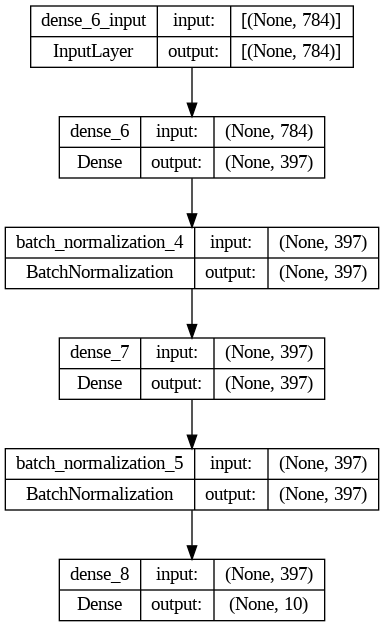

In [ ]:
from keras.utils import plot_model
plot_model(mlp, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import numpy as np
previsoes = [int(np.argmax(t)) for t in respostas]
classe2 = [int(np.argmax(t)) for t in classeT_dummy]

Obtenção dos maiores valores nas respostas e nas classes

In [ ]:
mlp.summary
from sklearn.metrics import classification_report
print(classification_report(classe2, previsoes))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.94      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.94      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Contrução de um relatório com as principais métricas.\
precision = porcentagem de predições corretas em relação ao total de predições \
recall = porcentagem de predições corretas em relação ao total de valores reais\
f1-score = média harmônica envolvendo a precisão\
support = quantidade de ocorrências da classe na base de dados

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(classe2,previsoes)
cm

array([[ 965,    0,    0,    3,    1,    1,    2,    6,    1,    1],
       [   0, 1125,    1,    1,    1,    0,    4,    1,    2,    0],
       [   3,    0, 1014,    6,    1,    0,    1,    4,    3,    0],
       [   0,    0,    3, 1000,    0,    1,    0,    3,    2,    1],
       [   2,    2,    4,    1,  958,    0,    5,    0,    0,   10],
       [   2,    1,    0,   31,    1,  839,   10,    1,    6,    1],
       [   2,    1,    2,    0,    1,    3,  947,    0,    2,    0],
       [   1,    2,    8,    4,    6,    0,    0, 1001,    2,    4],
       [   3,    3,    1,    5,    2,    1,    1,    5,  951,    2],
       [   4,    2,    0,    9,   11,    0,    0,    5,    0,  978]])

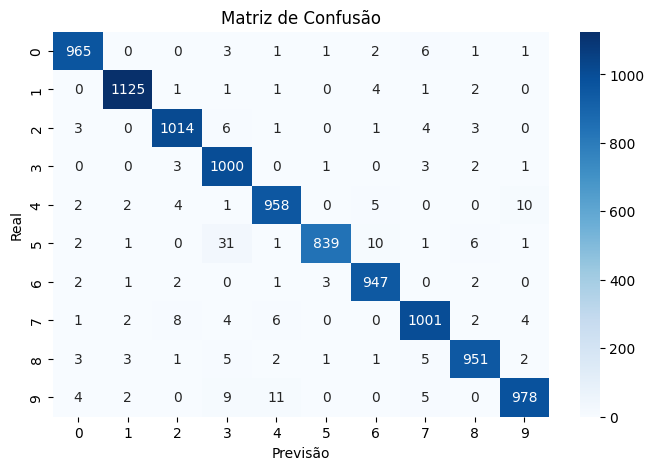

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()